In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_excel("Data_Train.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_df['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [7]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_df.dropna(inplace = True)

In [9]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
data = train_df.copy()

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [13]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

In [14]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_Datetime(feature)

In [15]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [17]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [18]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-11 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-11 05:50:00,2024-05-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-11 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-05-11 18:05:00,2024-05-11 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-05-11 16:50:00,2024-05-11 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [20]:
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [21]:
extract_hour_min(data , "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-11 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-11 05:50:00,2024-05-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-11 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [22]:
extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-05-11 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-11 05:50:00,2024-05-11 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-11 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [23]:
cols_to_drop = ['Arrival_Time','Dep_Time']

data.drop(cols_to_drop , axis = 1 , inplace=True)

In [24]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [25]:
data.shape

(10682, 16)

In [26]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Afternoon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [27]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4            Afternoon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

<AxesSubplot:>

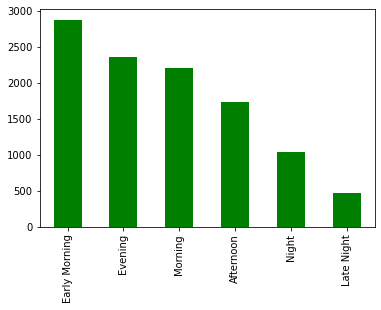

In [28]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar" , color = "Green")

In [29]:
!pip install plotly
!pip install chart_studio

In [30]:
!pip install cufflinks

In [31]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected = True)
cf.go_offline()

In [32]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = "bar")

In [33]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = '0m' + ' ' + x
        
    return x

In [34]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [35]:
data['Duration']

0        2h 50m
1        7h 25m
2        0m 19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     0m 3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [36]:
data['Duration'][0]

'2h 50m'

In [37]:
'2h 50m'.split(' ')

['2h', '50m']

In [38]:
'2h 50m'.split(' ')[0]

'2h'

In [39]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [40]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [41]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [42]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [43]:
data['Duration_mins'] =data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [44]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,0m 19h,2 stops,No info,13882,6,9,2019,9,25,4,25,0,19
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [45]:
data.shape

(10682, 18)

In [46]:
eval('2*60')

120

In [47]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ' , '+').str.replace('m','*1')

In [48]:
data['Duration_total_mins'].apply(eval)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

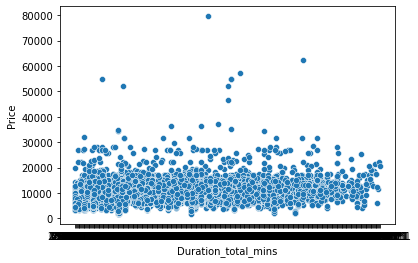

In [49]:
sns.scatterplot(x = 'Duration_total_mins' , y = 'Price',data = data)

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Price'>

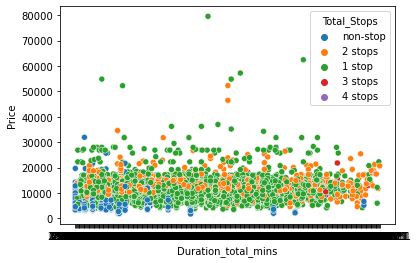

In [50]:
sns.scatterplot(x = 'Duration_total_mins' , y = 'Price',hue = "Total_Stops" , data = data)

In [51]:
data.shape

(10682, 19)

In [52]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [53]:
data[data['Airline'] == 'Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,0m 19h,2 stops,No info,13882,6,9,2019,9,25,4,25,0,19,0*1+19*60
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,15*60+30*1
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,21*60+5*1
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,25*60+30*1
13,Jet Airways,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,12,10,12*60+10*1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,7,20,7*60+20*1
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,19*60+55*1
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,0m 15h,2 stops,No info,16704,27,5,2019,13,25,4,25,0,15,0*1+15*60
10674,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,24,45,24*60+45*1


In [54]:
 data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

In [55]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

In [56]:
data.to_string()

'                                 Airline Date_of_Journey    Source Destination                              Route Duration Total_Stops               Additional_Info  Price  Journey_day  Journey_month  Journey_year  Dep_Time_hour  Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute  Duration_hours  Duration_mins Duration_total_mins\n0                                 IndiGo      2019-03-24  Banglore   New Delhi                          BLR → DEL   2h 50m    non-stop                       No info   3897           24              3          2019             22               20                  1                   10               2             50           2*60+50*1\n1                              Air India      2019-01-05   Kolkata    Banglore              CCU → IXR → BBI → BLR   7h 25m     2 stops                       No info   7662            5              1          2019              5               50                 13                   15               7             25       

In [57]:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

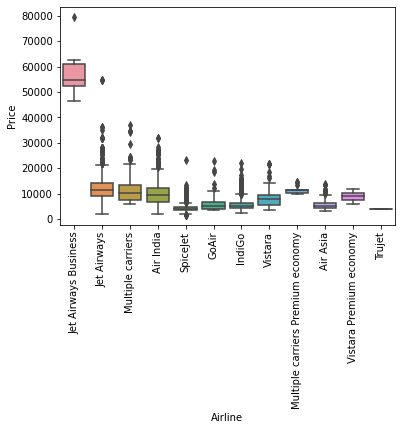

In [58]:
sns.boxplot( x = 'Airline' , y = 'Price' , data = data.sort_values('Price' , ascending = False ))
plt.xticks(rotation = 'vertical')
plt.show()

In [59]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]

In [60]:
num_col = [col for col in data.columns if data[col].dtype == "object"]

In [61]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [62]:
data['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [63]:
for sub_category in data['Source'].unique():
    data['Source_' + sub_category] = data['Source'].apply(lambda x : 1 if x == sub_category else 0)

In [64]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,2*60+50*1,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,7*60+25*1,0,1,0,0,0


In [65]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [66]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [67]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [68]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [69]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [70]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [71]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [72]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [73]:
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [74]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [75]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [76]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [77]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [78]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [79]:
data['Destination'] = data['Destination'].map(dict_dest)

In [80]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [81]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [82]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [83]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [84]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [85]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [86]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [87]:
data['Additional_Info'].value_counts()/len(data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [88]:
data.drop(columns = ['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_year'], axis = 1 , inplace = True)

In [89]:
data.drop(columns = ['Route','Duration'],axis = 1 ,inplace = True)

In [90]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [91]:
def plot(df,col):
    fig , (ax1,ax2,ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)
    sns.distplot(df[col], ax = ax3 , kde = False)

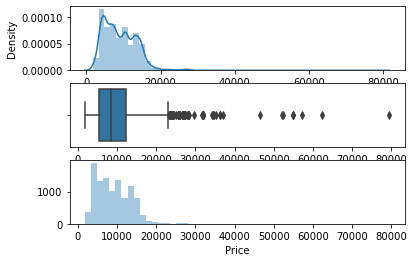

In [92]:
plot(data,'Price')

In [93]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [94]:
print(maximum)

23017.0


In [95]:
print(minimum)

-5367.0


In [96]:
print([price for price in data['Price'] if price > maximum or price < minimum ])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [97]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

In [98]:
data['Price'] = np.where(data['Price'] >= 35000 , data['Price'].median(),data['Price'])

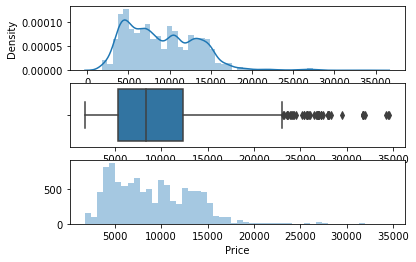

In [99]:
plot(data,'Price')

In [100]:
X = data.drop(['Price'],axis = 1)
y = data['Price']

In [101]:
from sklearn.feature_selection import mutual_info_regression

In [102]:
imp = mutual_info_regression(X , y)

In [103]:
imp

array([0.97217468, 1.01197278, 0.77938149, 0.20382963, 0.24154581,
       0.34029683, 0.26688184, 0.40611564, 0.34750322, 0.40856126,
       0.36603614, 0.3951685 , 0.45333019, 0.51794911, 0.13068485,
       0.20138795])

In [104]:
imp_df = pd.DataFrame(imp , index = X.columns)

In [105]:
imp_df.columns = ['Importance']

In [106]:
imp_df

,Importance
Airline,0.972175
Destination,1.011973
Total_Stops,0.779381
Journey_day,0.203830
Journey_month,0.241546
Dep_Time_hour,0.340297
Dep_Time_minute,0.266882
Arrival_Time_hour,0.406116
Arrival_Time_minute,0.347503
Duration_hours,0.408561


In [107]:
imp_df.sort_values(by = 'Importance' , ascending = False)

,Importance
Destination,1.011973
Airline,0.972175
Total_Stops,0.779381
Source_Delhi,0.517949
Source_Kolkata,0.453330
Duration_hours,0.408561
Arrival_Time_hour,0.406116
Source_Banglore,0.395169
Duration_mins,0.366036
Arrival_Time_minute,0.347503


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state = 40) 

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
model = RandomForestRegressor()

In [112]:
model.fit(X_train , y_train)

RandomForestRegressor()

In [113]:
y_pred = model.predict(X_test)

In [114]:
y_pred

array([ 5306.93      ,  3640.97      ,  7321.24      , ...,
        4329.32      , 11316.66466667,  6758.045     ])

In [115]:
from sklearn import metrics 

In [116]:
metrics.r2_score(y_test,y_pred)

0.8146592534090368

In [117]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [118]:
import pickle

In [119]:
file = open(r'C:\Users\mohit\OneDrive\Desktop\Netzwerk Academy\Flight Price Recomendation/rf_random.pkl','wb')

In [120]:
pickle.dump(model,file)

In [121]:
ml_model = open(r'C:\Users\mohit\OneDrive\Desktop\Netzwerk Academy\Flight Price Recomendation/rf_random.pkl','rb')

In [122]:
forest = pickle.load(ml_model)

In [123]:
y_pred2 = forest.predict(X_test)

In [124]:
metrics.r2_score(y_test , y_pred2)

0.8146592534090368

In [125]:
def mape(y_true,y_pred):
    y_true , y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [126]:
mape(y_test,y_pred)

12.995615612750155

In [127]:
from sklearn import metrics

In [128]:
def predict(model):
    ml_model = model.fit(X_train , y_train)
    print('Training Score : {}'.format(model.score(X_train , y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_prediction)
    print('r2_score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction))))
    print('MAPE : {}'.format(mape(y_test,y_prediction)))
    sns.distplot(y_test - y_prediction)

Training Score : 0.9532112671794545
Predictions are : [ 5095.75        3518.47        7313.37       ...  4236.94
 11174.1705      6675.47964286]


r2_score : 0.8130263125546888
MAE : 1178.708672675457
MSE : 3592752.292914024
RMSE : 1895.4556953181534
MAPE : 12.984048222148253


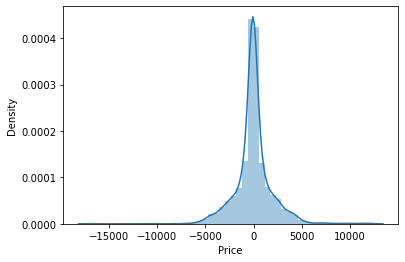

In [129]:
predict(RandomForestRegressor())

In [130]:
from sklearn.tree import DecisionTreeRegressor

Training Score : 0.9695346702628203
Predictions are : [ 4784.   4392.   6686.  ...  4384.  11615.5  7229. ]


r2_score : 0.7097152639110942
MAE : 1351.758211656059
MSE : 5577903.315868485
RMSE : 2361.7585219214275
MAPE : 14.845502001773752


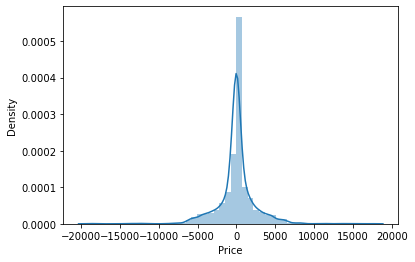

In [131]:
predict(DecisionTreeRegressor())

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
reg_rf = RandomForestRegressor()

In [147]:
np.linspace(start = 100,stop = 1200,num = 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [148]:
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num = 6)]

max_features = ["auto","sqrt"]

max_depth = [int(x) for x in np.linspace(start = 5,stop = 30,num = 4)]
min_samples_split = [5,10,15,100]

In [149]:
random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
}

In [150]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [151]:
rf_random = RandomizedSearchCV(estimator = reg_rf,param_distributions = random_grid,cv = 3, n_jobs = -1,verbose = 2)

In [152]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [153]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 13}

In [154]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, min_samples_split=5)

In [155]:
rf_random.best_score_

0.821685229072683